# Copernicus global ocean reanalysis product

### About the product

<img src="copernicus_reanalysis.jpg"
     alt="SSt from the model page on Copernicus Marine"
     style="float: left; margin-right: 30px;" 
    width="200"/>


Global ocean reanalysis from Mercator. The same model (but the "analysis" product?) is used in several Arctic/Nansen Basin-specific studies - seemingly with good success.

(see e.g. [Bertosio et al. 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JC016204) or [Athanase et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JC016463))

- Neat user guide including variable names and such [here](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-030.pdf).

**Names and versions**



The product nomecnlature is a little unclear to me. For one, I am not sure what the name of this product is (seems to be referred to differently in different places).

There are to be [different products](https://www.mercator-ocean.eu/en/ocean-science/operational-systems/operational-systems/) like `GLORYS12V1`, `PSY4V3R1` referred to in literature. They seem to be referred to [here](https://os.copernicus.org/articles/14/1093/2018/) as *systems*. That same source also seem to indicate that the output from GLORYS and PSY is far from identical.  

- From what I can deduce, `PSY` is forecasting and `GLORYS` is reanalysis. Definitely not clear though.
- On the Copernicus Marine page, there are two separate products:
    1. [Global Ocean Physics Analysis and Forecast](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/description) (available 2020 to present)(*seem to have* `anfc` *in the product ID*)
    2. [Global Ocean Physics Reanalysis](https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/description) (available 1993 to June 2021 and onward to Jan 2024 (*interim*)) (*seem to have* `my` or `myint`*in the product ID*)

`my` - multiyear -  is the "final", processed reanalysis. 
`myint` is a temporary, *interim* version covering the last few years.



### About the data

#### Reanalysis product

- **Global coverage, 1/12 degrees.**
- NEMO ocean model / LIM2 sea ice model (simpler than CICE).. 
- **Reanalysis** assimilating SST, SSH, in-situ CTDs, and SIC.
    - There are supposed to be both assimilating and "free" model runs - I'm not sure where.
- 50 fixed depth levels.
- Sea ice component.[1993-01-01 00:00:00, 2021-06-30 00:00:00]
- **1 Jan 1993** to **30 Jun 2021** (the *multi-year* product, `my)
- **1 Jul 2021** to **2024-01-23** (the *multi-year interim* product, `myint`)
- Available daily, monthly and as climatological means.
- Variables: pot temp, sal, SSH, mixed layer thickness, ocean velocity, ice concentration/thickness/velocity,  

#### Forcing

- Climatological runoff for Svalbard.
- 100 major rivers from Dai et al., 2009 and runoff fluxes coming from Greenland and Antarctica.
- Atmospheric forcing from the Integrated Forecast System (IFS) at European Centre for Medium Weather Forecasts.

##### Assimilated observations

- L3S SST (ODYSSEA)
- SIC (OSI SAF)
- SLA (AVISO)
- T/S profiles (CORIOLIS database)
- MDT (mean dynamic topography) adjusted based on CNES-CLS18, Mulet et al., 2021
- WOA 2013 climatology (temperature and salinity) below 2000 m 

#### Access

- The files are  served at the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products). It seems the best way to access them is the `copernicusmarine` API. Requires login with (free) registration.
- The dynamic variables (salt, temp, ocean velocities, ssh, mld, sic, sit, si velocities) are found on the main ID (`cmems_mod_glo_phy_my_0.083deg_P1D-m` for daily variables)
- Static variables include stuff like land mask and bottom depth. They are found on the ID `cmems_mod_glo_phy_my_0.083deg_static`
- `cmems_mod_glo_phy_myint_0.083deg_P1D-m` covers the persion from 1 Jul 2021
- `my`= *Multi-year*
- `myint` = *Multi-year interim*

____

#### Load data using `copernicusmarine`

Modified from the example in [this guide](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely).

In [4]:
import matplotlib.pyplot as plt
import cmocean
import copernicusmarine
import numpy as np

Using the `copernicusmarine` API, we can specify a subset of the (presumably giant) dataset.

My understanding is that this does lazy loading of the subset, with `copernicusmarine.open_dataset` being analogous to `xarray.open_dataset`.

#### Data request for potential temperature

In [31]:
# Set parameters
data_request = {
   "dataset_id" : "cmems_mod_glo_phy_my_0.083deg_P1D-m",
   "longitude" : [0, 80], 
   "latitude" : [70, 85],
   "time" : ["2015-01-01", "2026-01-01"],
   "variables" : ["thetao"]
}

# Load xarray dataset
ds = copernicusmarine.open_dataset(
    dataset_id = data_request["dataset_id"],
    minimum_longitude = data_request["longitude"][0],
    maximum_longitude = data_request["longitude"][1],
    minimum_latitude = data_request["latitude"][0],
    maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    variables = data_request["variables"]
)

INFO - 2024-04-30T22:41:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-04-30T22:41:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-04-30T22:41:51Z - Service was not specified, the default one was selected: "arco-time-series"
WARNING - 2024-04-30T22:41:52Z - Some or all of your subset selection [2015-01-01 00:00:00, 2026-01-01 00:00:00] for the time dimension  exceed the dataset coordinates [1993-01-01 00:00:00, 2021-06-30 00:00:00]


In [43]:
#### Data request for land mask
# Set parameters
data_request_mask = {
   "dataset_id" : "cmems_mod_glo_phy_my_0.083deg_static",
   "longitude" : [0, 80], 
   "latitude" : [70, 85],
   "variables" : ["mask"]
}
# Load xarray dataset
ds_mask = copernicusmarine.open_dataset(
    dataset_id = data_request_mask["dataset_id"],
    minimum_longitude = data_request_mask["longitude"][0],
    maximum_longitude = data_request_mask["longitude"][1],
    minimum_latitude = data_request_mask["latitude"][0],
    maximum_latitude = data_request_mask["latitude"][1],
    variables = data_request_mask["variables"]
)

INFO - 2024-04-30T22:48:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-04-30T22:48:45Z - Dataset part was not specified, the first one was selected: "bathy"
INFO - 2024-04-30T22:48:45Z - Service was not specified, the default one was selected: "static-arco"


____

### *Example:* Plot ocean temperature at 100 m depth

##### Choose a depth level and a time stamp we want to examine 

In [35]:
depth_closest = 100
date = '2019-03-03'

##### Make subsets of the files with only this depth level and time stamp

In [36]:
ds_select = ds.sel(depth = depth_closest, time= date, method = 'nearest')

##### Make a land mask

Want the surface level of the mask.

In [45]:
ds_mask_sel = ds_mask.sel(depth = 0,  method = 'nearest')

**Plot ocean temperature** 

Can take a few minutes! (Consider a smaller selected area..)

/tmp/ipykernel_695605/2584644912.py:4: UserWarning: linewidths is ignored by contourf
  ax.contourf(ds_mask_sel.mask, levels = [0, 0.5, 1.2], colors = ['gray','none'], linewidths = 0.7)


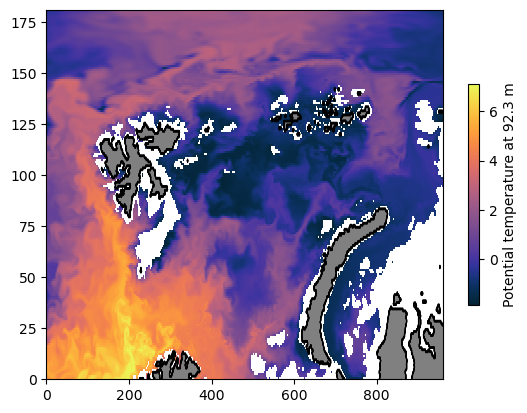

In [61]:
fig, ax = plt.subplots()#; ax.set_aspect('equal')
C = ax.pcolormesh(ds_select.thetao, cmap = cmocean.cm.thermal)
ax.contour(ds_mask_sel.mask, colors = ['k',], linewidths = 0.7)
ax.contourf(ds_mask_sel.mask, levels = [0, 0.5, 1.2], colors = ['gray','none'], linewidths = 0.7)

plt.colorbar(C, shrink = 0.6,
             label = f'Potential temperature at {float(ds_select.depth):.1f} m')

### Examine spatial resolution 
Interested in the x/y resolution around 80N. 

In [79]:
dxy_deg = 0.0833358

In [99]:
dy_km = dxy_deg  * 111.1
dx_km = dxy_deg  * 111.1 * np.cos(np.deg2rad(80))

In [100]:
print(f'dy = {dy_km:.1f} km')
print(f'dx at 80N = {dx_km:.1f} km')

dy = 9.3 km
dx at 80N = 1.6 km
